In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stopwords/stopwords.txt
/kaggle/input/doubanmovieshortcomments/DMSC.csv


In [2]:
file_path='/kaggle/input/doubanmovieshortcomments/DMSC.csv'

In [3]:
import jieba

# 加载停用词表
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = {line.strip() for line in file}
    return stopwords

# 假设停用词表文件名为 stopwords.txt
stopwords = load_stopwords('/kaggle/input/stopwords/stopwords.txt')

# 待处理的中文文本
text = "这是一段示例文本，用于展示如何使用 jieba 去除停用词。"

# 使用 jieba 进行分词
words = jieba.lcut(text)

# 去除停用词
filtered_words = [word for word in words if word not in stopwords and word.strip()]

# 输出去除停用词后的结果
print("去除停用词后的词语列表：", filtered_words)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.624 seconds.
Prefix dict has been built successfully.


去除停用词后的词语列表： ['这是', '一段', '示例', '文本', '用于', '展示', '使用', 'jieba', '去除', '停', '用词']


In [4]:
import csv
with open(file_path, mode='r', encoding='utf-8', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            i=0
            for row in reader:
                print(row)
                i=i+1
                if i==10:
                  break

{'\ufeffID': '0', 'Movie_Name_EN': 'Avengers Age of Ultron', 'Movie_Name_CN': '复仇者联盟2', 'Crawl_Date': '2017-01-22', 'Number': '1', 'Username': '然潘', 'Date': '2015-05-13', 'Star': '3', 'Comment': ' 连奥创都知道整容要去韩国。', 'Like': '2404'}
{'\ufeffID': '1', 'Movie_Name_EN': 'Avengers Age of Ultron', 'Movie_Name_CN': '复仇者联盟2', 'Crawl_Date': '2017-01-22', 'Number': '2', 'Username': '更深的白色', 'Date': '2015-04-24', 'Star': '2', 'Comment': ' 非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、妇联内部都没什么火花。团结-分裂-团结的三段式虽然老套但其实也可以利用积攒下来的形象魅力搞出意思，但剧本写得非常肤浅、平面。场面上调度混乱呆板，满屏的铁甲审美疲劳。只有笑点算得上差强人意。', 'Like': '1231'}
{'\ufeffID': '2', 'Movie_Name_EN': 'Avengers Age of Ultron', 'Movie_Name_CN': '复仇者联盟2', 'Crawl_Date': '2017-01-22', 'Number': '3', 'Username': '有意识的贱民', 'Date': '2015-04-26', 'Star': '2', 'Comment': ' 2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出新，实则俗不可耐；以为场面很high，实则high劲不足。气！上一集的趣味全无，这集的笑点明显刻意到心虚。全片没有任何片段给我有紧张激动的时候，太弱了，跟奥创一样。', 'Like': '1052'}
{'\ufeffID': '3', 'Movie_Name_EN': 'Avengers Age of Ultron', 'Movi

In [5]:
with open(file_path, mode='r', encoding='utf-8', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            comment_datas_all=[]
            columns=['Comment']
            data_star=set()
            for row in reader:
                data_star.add(row['Star'])
                selected_row = {col: row.get(col) for col in columns}
                selected_row['Score']= 1 if int(row['Star'])< 4 else 0
                comment_datas_all.append(selected_row)

In [6]:
##将豆瓣评论的电影名和评论信息写入到txt 用于生成sentencepiece 词汇表
with open(file_path, mode='r', encoding='utf-8', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            comment_datas=[]
            columns=['Movie_Name_CN','Star','Comment']
            data_star=set()
            data_movie_name=set()
            for row in reader:
                ##小于10个字的评论去掉
                if len(row['Comment'].strip())<10:
                    continue
                data_star.add(row['Star'])
                selected_row = {col: row.get(col) for col in columns}
                selected_row['Score']= 1 if int(row['Star'])< 3 else 0
                comment_datas.append(selected_row) 
                with open('douban_comment.txt', 'a', newline='', encoding='utf-8') as txtfile:
                    if row['Movie_Name_CN'] in data_movie_name:
                        txtfile.write(row['Comment']+"\n")
                    else:
                        txtfile.write(row['Movie_Name_CN']+","+row['Comment']+"\n")
                        data_movie_name.add(row['Movie_Name_CN'])

In [7]:
spm_pth="/kaggle/working/douban_comment.txt"

In [8]:
import sentencepiece as spm

spm.SentencePieceTrainer.Train(input=spm_pth,
                              model_prefix="douban_comment_spm"
                              ,vocab_size=10000)

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: /kaggle/working/douban_comment.txt
  input_format: 
  model_prefix: douban_comment_spm
  model_type: UNIGRAM
  vocab_size: 10000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enabl

In [9]:
##加载模型进行分词
sp=spm.SentencePieceProcessor(model_file='douban_comment_spm.model')

print(sp.EncodeAsPieces("连奥创都知道整容要去韩国"))
print(sp.EncodeAsPieces("虽然从头打到尾，但是真的很无聊啊"))

['▁', '连', '奥创', '都', '知道', '整容', '要去', '韩国']
['▁虽然', '从头打到尾', ',', '但是', '真的很', '无聊', '啊']


In [10]:
###使用sp分词
with open(file_path, mode='r', encoding='utf-8', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            comment_datas_sp=[]
            columns=['Comment']
            data_star=set()
            for row in reader:
                ##小于10个长度和大于200长度的评论不要，评价为三个星的也不要
                if len(row['Comment'].strip())<10 or len(row['Comment'].strip())>200 or int(row['Star'])==3:
                    continue            
                data_star.add(row['Star'])
                words = sp.EncodeAsPieces(row['Comment']) 
                comment_datas_sp.append((words,1 if int(row['Star'])< 4 else 0))

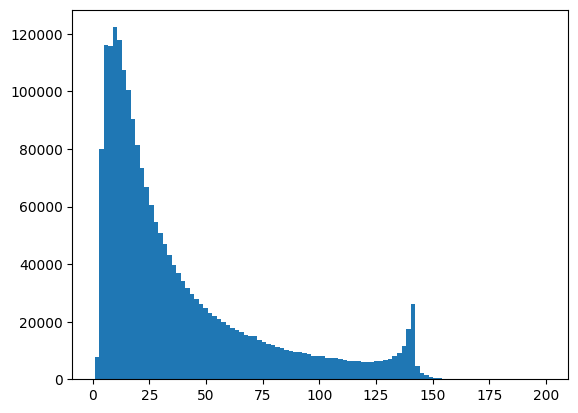

In [11]:
import matplotlib.pyplot as plt

comments_len = [len(text['Comment']) for text in comment_datas_all]
plt.hist(comments_len, bins=100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

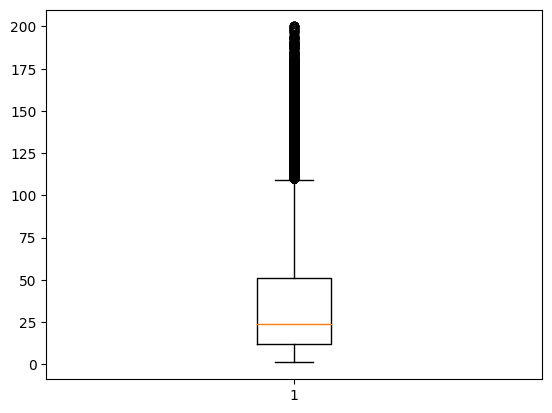

In [12]:
plt.boxplot(comments_len)
plt.show

In [14]:
import jieba
import csv
with open(file_path, mode='r', encoding='utf-8', newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            comment_datas_jieba=[]
            columns=['Comment']
            data_star=set()
            for row in reader:
                ##
                if len(row['Comment'].strip())<10 or len(row['Comment'].strip())>200 or int(row['Star'])==3  :
                    continue            
                data_star.add(row['Star'])
                words = jieba.lcut(row['Comment']) 
                filtered_words = [word for word in words if word not in stopwords and word.strip()]
                comment_datas_jieba.append((filtered_words,1 if int(row['Star'])< 4 else 0))
               

In [15]:
comment_datas_jieba[0]

(['非常',
  '失望',
  '剧本',
  '完全',
  '敷衍了事',
  '主线',
  '剧情',
  '没',
  '突破',
  '大家',
  '理解',
  '所有',
  '人物',
  '都',
  '缺乏',
  '动机',
  '正邪',
  '之间',
  '妇联',
  '内部',
  '都',
  '没什么',
  '火花',
  '团结',
  '-',
  '分裂',
  '-',
  '团结',
  '三段式',
  '老套',
  '其实',
  '利用',
  '积攒',
  '下来',
  '形象',
  '魅力',
  '搞',
  '出',
  '意思',
  '剧本',
  '写得',
  '非常',
  '肤浅',
  '平面',
  '场面',
  '上',
  '调度',
  '混乱',
  '呆板',
  '满屏',
  '铁甲',
  '审美疲劳',
  '笑',
  '点算',
  '上',
  '差强人意'],
 1)

In [16]:
print(len(comment_datas_all))
print(len(comment_datas_jieba))
print(len(comment_datas_sp))

2125056
1300875
1300875


In [22]:
###保存评论数据
import pickle
with open('./douban_comments_jieba.pkl','wb') as f:
    pickle.dump(comment_datas_jieba,f)

In [23]:
###保存评论数据
import pickle
with open('./douban_comments_sp.pkl','wb') as f:
    pickle.dump(comment_datas_sp,f)

In [24]:
def build_from_doc(doc):
    vocab = set()
    for line in doc:
        vocab.update(line[0])

    vocab =  ['PAD','UNK'] + list(vocab)  # PAD: padding, UNK: unknown
    w2idx = {word: idx for idx, word in enumerate(vocab)}
    return w2idx

In [25]:
# 构建词汇表  jeiba
vocab_jieba = build_from_doc(comment_datas_jieba)
print('词汇表大小:', len(vocab_jieba))

词汇表大小: 281449


In [27]:
# 构建词汇表  spm
vocab_sp = build_from_doc(comment_datas_sp)
print('词汇表大小:', len(vocab_sp))

词汇表大小: 14844


In [28]:
# 模型词典 jieba分词工具 保存词典
import torch
torch.save(vocab_jieba, 'jieba_comments_vocab.pth')

In [29]:
# 模型词典 保存词典
import torch
torch.save(vocab_sp, 'sp_comments_vocab.pth')